In [1]:
from bayes import *

In [138]:
import warnings
warnings.simplefilter('ignore')
%pip install mpmath
from mpmath import betainc
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

import numpy as np
import pylab as plt

Note: you may need to restart the kernel to use updated packages.


In [101]:
from scipy.stats import norm,sem,bernoulli, beta               


In [102]:
cc = pd.read_excel(r"Testing.xlsx")
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User ID  23 non-null     float64
 1   Type     23 non-null     float64
 2   Time     23 non-null     float64
 3   Buy      23 non-null     float64
dtypes: float64(4)
memory usage: 864.0 bytes


In [105]:
cc

,User ID,Type,Time,Buy
0,1.0,0.0,98.0,0.0
1,2.0,0.0,52.0,1.0
2,3.0,0.0,37.0,1.0
3,4.0,0.0,118.0,0.0
4,5.0,0.0,61.0,0.0
5,6.0,0.0,86.0,0.0
6,7.0,0.0,46.0,1.0
7,8.0,0.0,85.0,0.0
8,9.0,0.0,52.0,1.0
9,10.0,0.0,58.0,1.0


In [ ]:
data = {'name': ['Somu', 'Kiku', 'Amol', 'Lini'],'physics': [68, 74, 77, 78],'chemistry': [84, 56, 73, 69],'algebra': [78, 88, 82, 87]}

In [ ]:
for e,i in enumerate(cc["Time"]):
    i = str(i)
    f=int(i[0])
    g = int(i[2:])
    cc["Time"][e]= f*60+g
        
        
        
        
        

In [124]:
test

,User ID,Type,Time,Buy
11,12.0,1.0,74.0,0.0
13,14.0,1.0,36.0,1.0
14,15.0,1.0,37.0,1.0
15,16.0,1.0,74.0,0.0
16,17.0,1.0,49.0,1.0
17,18.0,1.0,69.0,0.0
18,19.0,1.0,63.0,0.0
19,20.0,1.0,93.0,0.0
20,21.0,1.0,161.0,0.0
21,22.0,1.0,77.0,0.0


In [107]:
control = cc[cc["Type"]==0.0]

In [108]:
test = cc[cc["Type"]==1.0]

In [109]:
control["Time"].mean()

64.58333333333333

In [110]:
test["Time"].mean()

66.9090909090909

In [111]:
len(test)

11

In [112]:
len(control[control["Buy"]==1.0])

7

In [113]:
len(test[test["Buy"]==1.0])

4

In [114]:

imps_ctrl, convs_ctrl = 12, 7   # entrar, comprar
imps_test, convs_test= 11, 4


CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'


'TASAS: Control=0.5833333333333334, Test=0.36363636363636365'

In [115]:

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [116]:
beta_control.mean(), beta_test.mean()

(0.5714285714285714, 0.38461538461538464)

In [117]:
x=np.linspace(0, 1, 1000)
def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

In [126]:
salto=(beta_control.mean() - beta_test.mean())/beta_test.mean()

salto

0.48571428571428554

In [127]:
beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [128]:
prob = calc_prob(beta(a_C, b_C),beta(a_T, b_T))
prob


0.8434340326519624

In [130]:
'''El control aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.\
format(salto*100, prob*100)

'El control aumenta la tasa de conversion en un 48.57%, con una probabilidad del 84.34%'

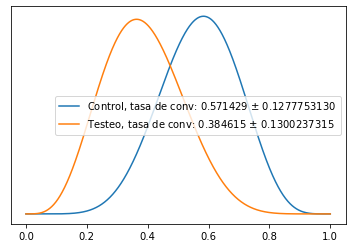

In [122]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [133]:
control["Time"].mean(),test["Time"].mean(),control["Time"].std(),test["Time"].std()

(64.58333333333333, 66.9090909090909, 26.127165706956962, 40.01363404004827)

In [136]:
ttest_ind(control["Time"],test["Time"])

Ttest_indResult(statistic=-0.16648690860194607, pvalue=0.869366370357538)

In [139]:
observaciones = [12,11]
conversiones = [7,4]
z_score, p_valor = proportions_ztest(conversiones, nobs=observaciones)

(control_a, trata_a), (control_b, trata_b) = proportion_confint(conversiones, 
                                                                nobs=observaciones,
                                                                alpha=0.05)

In [140]:
print(f'z-score: {z_score:.2f}')
print(f'p-valor: {p_valor:.3f}')
print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')
print(f'intervalo conf 95% para grupo tratamiento: [{trata_a:.3f}, {trata_b:.3f}]')

z-score: 1.05
p-valor: 0.292
intervalo conf 95% para grupo control: [0.304, 0.862]
intervalo conf 95% para grupo tratamiento: [0.079, 0.648]
